#### CLUSTERING WITH KMEANS AND DBSCAN

#### KMEANS

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [17]:
data = load_iris(as_frame=True)['data']

In [3]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
# fit the model

model = KMeans(n_clusters=4, n_init='auto', max_iter=100,random_state= 23)
model.fit(X = data)
preds = model.labels_
print(f'Model Inertia: {model.inertia_}')
preds

Model Inertia: 57.22847321428572


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3,
       0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0])

### CHOOSING THE OPTIMAL K USING ELBOW CURVE

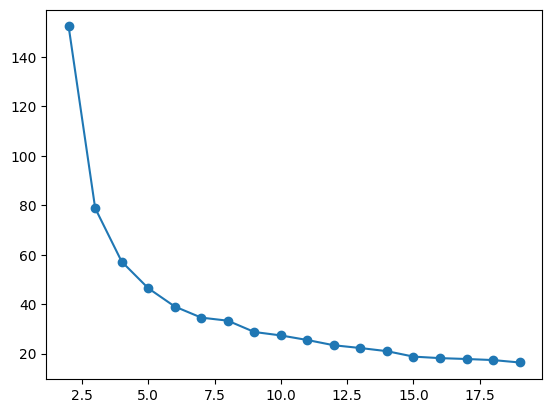

In [22]:
number_clusters = list(range(2, 20))
inertia_list = []
for k in number_clusters:
    model = KMeans(n_clusters=k,n_init='auto',random_state=23)
    model.fit(data)
    inertia = model.inertia_
    inertia_list.append(inertia)
    
    
plt.plot(number_clusters, inertia_list, '-o')

In [31]:
# visualize the clusters
import plotly.express as px

px.scatter_3d(data_frame = data, x = 'sepal length (cm)',
           y = 'sepal width (cm)', z = 'petal width (cm)',color=preds)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('sepal length (cm)=%{x}<br>sepa' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                                         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                                         1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
                                         0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2,
                                         2, 0, 2, 2, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0,
                                         3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3,
                                         3, 3, 0, 0, 3, 0]),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8, 4.3,
                          5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. , 5. , 5.2,
                          5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4, 5.1, 5. , 4.5,
                          4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4, 6.9, 5.5, 6.5, 5.7,
                          6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6,
                          5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6. , 5.7, 5.5, 5.5, 5.8, 6. ,
                          5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2,
                          5.1, 5.7, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4,
                          6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2,
                          6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9,
                          6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]),
              'y': array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. , 3. ,
                          4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. , 3.4, 3.5,
                          3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. , 3.4, 3.5, 2.3,
                          3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3, 2.8, 2.8,
                          3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9, 3.1, 3. , 2.7, 2.2, 2.5,
                          3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. , 2.9, 2.6, 2.4, 2.4, 2.7, 2.7,
                          3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6, 3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9,
                          2.5, 2.8, 3.3, 2.7, 3. , 2.9, 3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7,
                          3. , 2.5, 2.8, 3.2, 3. , 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2,
                          2.8, 3. , 2.8, 3. , 2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1,
                          3.1, 3.1, 2.7, 3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ]),
              'z': array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1,
                          0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2, 0.4, 0.2,
                          0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2, 0.2, 0.3, 0.3,
                          0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5, 1.5, 1.3, 1.5, 1.3,
                          1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3, 1.4, 1.5, 1. , 1.5, 1.1,
                          1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1. , 1.1, 1. , 1.2, 1.6,
                          1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2, 1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3,
                          1.1, 1.3, 2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9,
             

### DBSCAN

In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [33]:
data = load_iris(as_frame=True)['data']

In [74]:
model = DBSCAN(eps=1, min_samples=14)
model.fit(data)
predictions = model.labels_
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [49]:
score = silhouette_score(X = data, labels = predictions)
print(f'silhouette_score: {score}')

silhouette_score: 0.4860341970345691


In [75]:
# manual optimization of dbscan

epsilon = [x/100 for x in range(5, 101) if x % 5 == 0]
min_samples = list(range(2, 25))
result = {}

for eps in epsilon:
    for samples in min_samples:
        model = DBSCAN(eps=eps, min_samples=samples)
        model.fit(data)
        predictions = model.labels_
        try:
            score = silhouette_score(X = data, labels = predictions)
        except ValueError:
            score = 0
        result.update({score:[eps, samples]})

In [76]:
maximum_score = max(list(result.keys()))

In [77]:
maximum_score

0.6867350732769781

In [78]:
result[maximum_score]

[1.0, 14]